<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# Recitation 10: Neural Networks

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 10.0 Overview of Learning Objectives:

In this recitation we will explore the following objectives:

-Understand the conceptual basis for a neural network, beginning with a single neuron and building to a multi-layer network

-Discuss how training a neural network actually works

-Look at computational examples using PyTorch

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 10.1 The Neuron

Here we'll be discussing the $\text{neuron}$, which is the fundamental building block of a neural network:

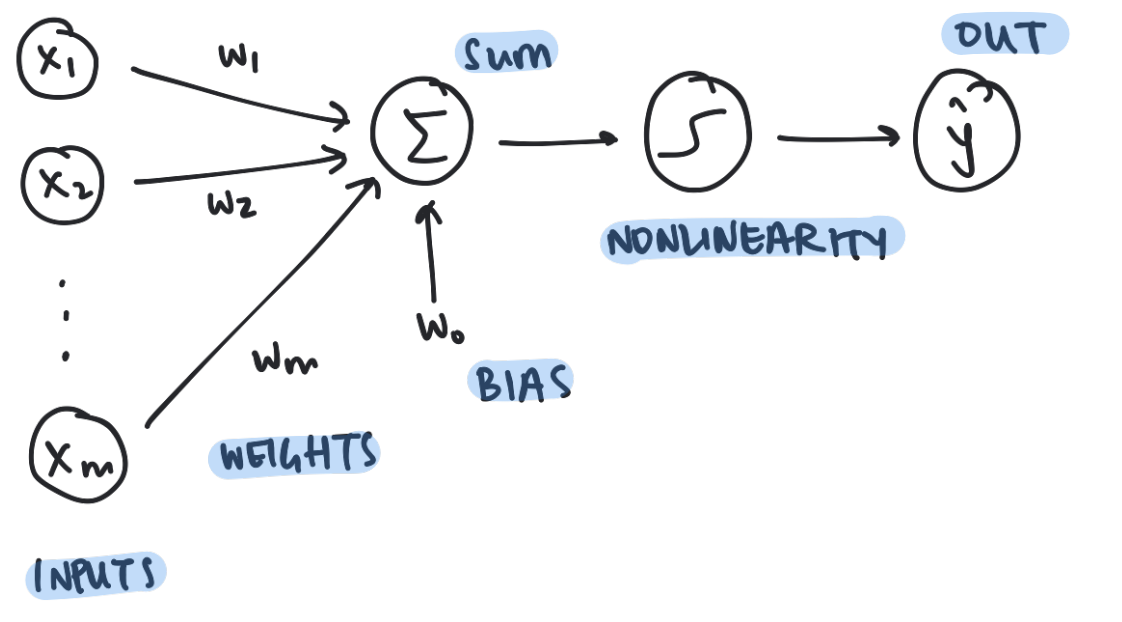
Breaking this picture down we start with:
    
1. $m$ different inputs $x_1,x_2,...,x_m$ each with individual weights $w_1,w_2,...,w_m$
1. These are fed into a weighted sum along with an independent bias term $w_0$
1. This sum is fed into some function that produces some nonlinearity before finally returning our output, $y$
    
We can write this down in more math-friendly notation:
\begin{equation*}
\begin{split}
\hat{y}=& g\left(w_0+\sum_{i=1}^{m} x_i w_i\right) \equiv g(z)\\
=& g(w_0+X^T W)
\end{split}
\end{equation*}
Where here $g$ is our activation function which introduces the nonlinearity for our final output as discussed before.
<!--start-block-->
<hr style="height: 1px;">

## 10.2 Activation Functions
    
We can take a look at a popular activation function known as the $\text{sigmoid}$:
\begin{equation*}
\sigma(z)=\frac{1}{1+e^{-z}}
\end{equation*}

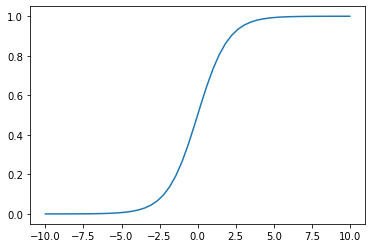

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10,10,50)
y = 1/(1+np.exp(-x))
plt.plot(x,y)

Where we can see that $\sigma(z)$ ranges from $[0,1]$ which means it can be interpreted as a probability since probability also ranges from $[0,1]$.<br><br>
Our choice of activation function is pretty important and often needs to be chosen based on our desired classification problem:
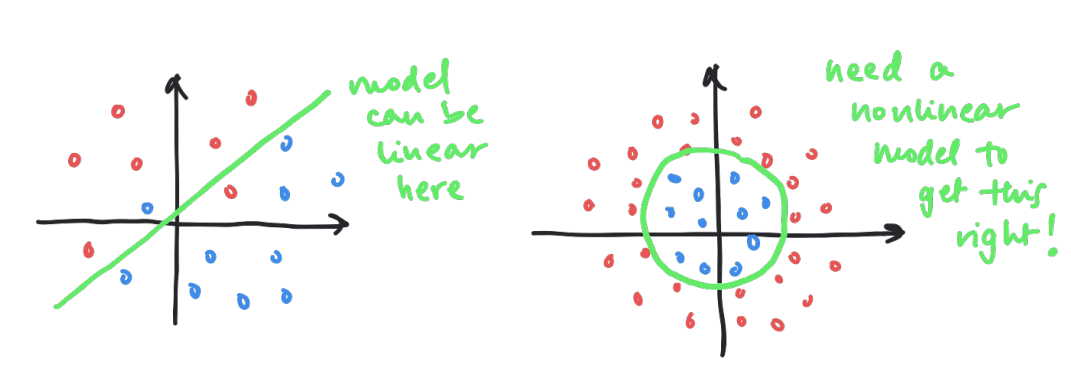

<!--start-block-->
<hr style="height: 1px;">

## 10.3 Classification

So how does classification work? Let's look at the simplest case and assume for our two inputs we already know our weights and we're only dealing with one neuron:
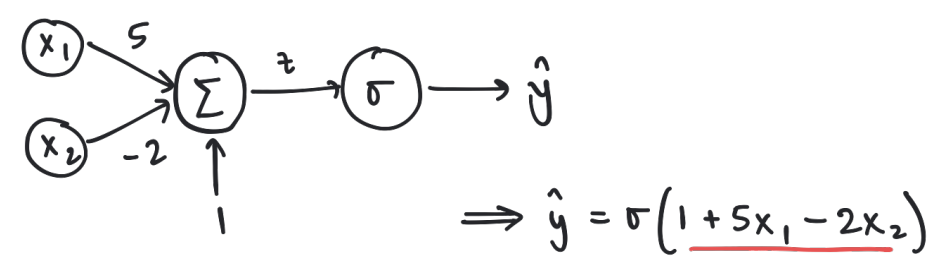

Let's take a look at two sets of inputs:
* $X_1 = (x_1,x_2) =(1,1)$
* $X_2 = (x_1,x_2) =(-2,1)$

For $X_1$ we get:
\begin{gather*}
\begin{split}
\hat{y}=& \sigma(1+5-2)\\
=& \sigma(4)\\
\approx & 0.982
\end{split}
\end{gather*}
For $X_2$ we get:
\begin{gather*}
\begin{split}
\hat{y}=& \sigma(1-10-2)\\
=& \sigma(-11)\\
\approx & 1.7 \cdot 10^{-5}
\end{split}
\end{gather*}
<br>Where we can simply see that the output from $X_1$ is greater than $0.5$ and the output from $X_2$ is less than 0.5. <br><br>
This is known as a $\text{linear logistic classifier}$, which for a binary classification problem for predictions $A$ and $B$ will predict $A$ is $\hat{y}>0.5$ and $B$ if $\hat{y}<0.5$. We can set this threshold though to get a more accurate classification.

<!--start-block-->
<hr style="height: 1px;">

## 10.4 Putting Everything Together

Everything we've seen so far is just with a single neuron, but obviously in constructing a network we'll be putting a bunch of these together. With many inputs or neurons it's difficult to draw out graphically but this serves as a good picture of a multiple neurons:
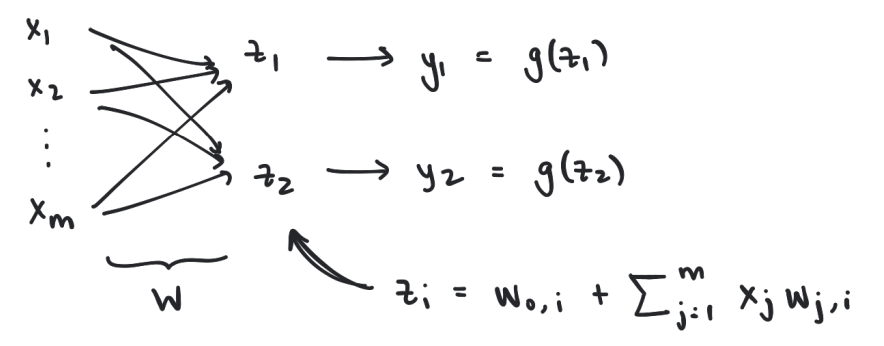
These weights $W$ define a layer of the neural network. Because it's so connected, these are often called a $\text{dense layer}$. <br> Taking a look at a complete single layer neural network:
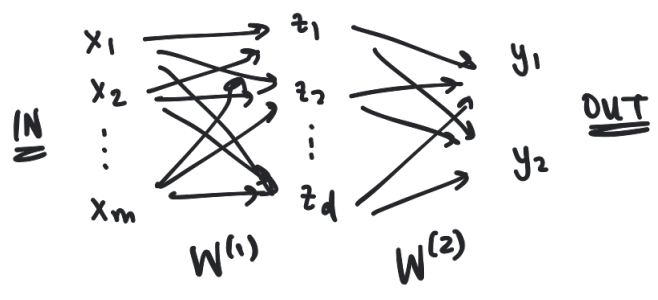
With two weight matrices $W^{(i)}$. Here the layer $z_i$ forms a $\text{hidden layer}$ since we neither see the direct inputs or outputs. <br><br>

Just like how we can connect multiple neurons to make a layer, we can stack multiple layers to form a more complicated network!

<!--start-block-->
<hr style="height: 1px;">

## 10.5 How to Train your <s>Dragon</s> Neural Network

So from what we learned so far we have a bunch of layers of neurons, do we have a perfect working neural network now? Unfortunately no, we now need to $\text{train}$ our neural network to optimize our collection of weights $W$.<br><br>
To do this training we need some means of quantifying how wrong our network's current predictions are. <br>This is known as a $\text{loss function}$: $\mathcal{L}\left(f(x^{(i)};W),y^{(i)}\right)$<br>
Which has the arguments of:
* $f(x,W)$ is our current prediction
* $y$ is the actual outcome, taken from our training data <br><br>
For example for a binary classification problem we have the function:
\begin{equation*}
J(w)=\frac{1}{n}\sum_{i=1}^{n} y^{(i)} \cdot \log \left(f\left(x^{(i)};W\right)\right)+\left(1-y^{(i)}\right)\cdot \log\left(1-f\left(x^{(i)};W\right)\right)
\end{equation*}
* Here $J(W)$ is an "objective function", meant to penalize the disparity between our predicted and actual values
* Since we're dealing with a binary function $y^{(i)}$, our actual data outputs, are either 0 or 1
* While $f(x,W) \in [0,1]$<br><br>

Here our goal is loss optimization since we want to be as correct as possible with the given training data.<br> This is equivalent to wanting to minimize $J(W)$ to find $W^*$, the argument that minimizes the value of $J(W)$ and gives the best weights for our neural network.<br><br>

For this we can use a minimization algorithm like $\text{gradient descent}$, in which we repeatedly calculate a gradient and update the weights:
\begin{gather*}
W_{\text{new}}=W-\eta \cdot \frac{\partial}{\partial W}J(W)
\end{gather*}
Where $\eta$ is a quantity referred to as the learning rate.<br><br>
Caclulating the value $\partial J/\partial W$ is not trivial at all, though it's explained more in depth in 6.036 if you're interested in learning more. <br><br>Our choice of $\eta$ also makes a large difference in our optimization. If we wish to find the minimum of our loss function, too small a value of $\eta$ can stop us from ever reaching a global minimum and too large a value can cause us to constantly overshoot the global minimum in either direction:

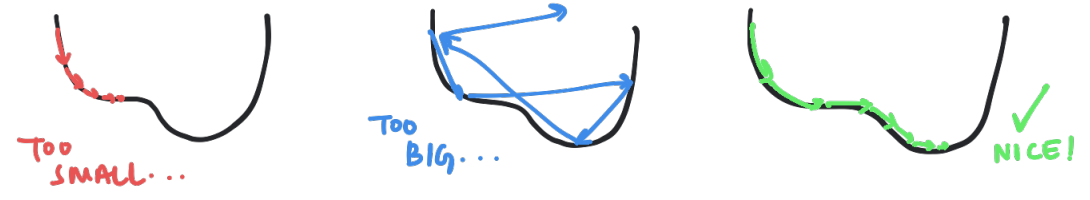

This problem is typically solved by using pre-desigend optimizers with sophisticated adaptive learning rates such as $\text{Adam}$ (more here if curious: https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c).

<!--start-block-->
<hr style="height: 1px;">

## 10.6 Overfitting

So as we saw in the last section we want to get the best possible weights for our neural network so as to be correct as possible on the training data, up to a certain point. The caveat here is that we want to avoid training to the point where our network becomes overcomplicated and focused too heavily on a specific task.
<br>
We can see this visually with the simple linear model below for a classification problem:
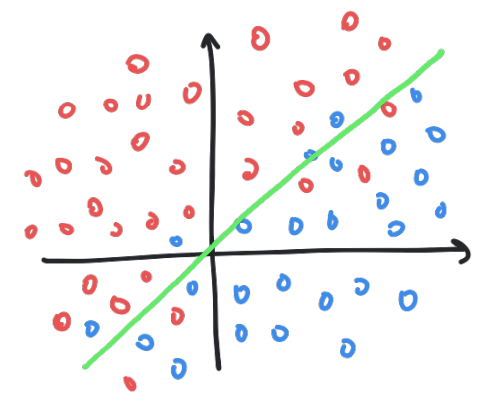
Our network isn't perfect, and there are a few points that fall incorrectly on either side of our classifier. In theory with more training, different activation functions, and better optimization we could get a much better performing network like the one below:
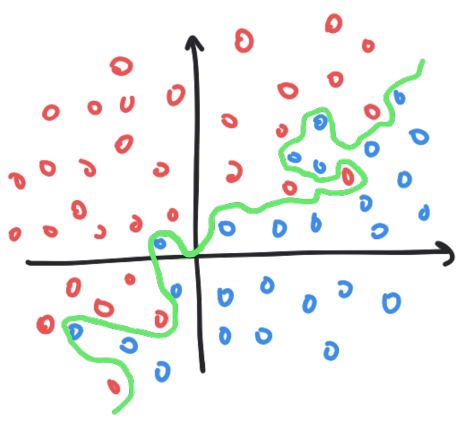
In which we see 100% accuracy from our network, however this isn't exactly what we're looking for from our neural network. This network is overly complex and will likely actually be likely less accurate for more general datasets apart from what we've given it in training. This is known as $\text{overfitting}$, and there a few steps we can take to avoid this.<br><br>

A more complex but possibly more intuitive example of why this would be a problem is to imagine a neural network meant to take someone's pictures of someone's handwriting and turn it into text. If we had a network train hard enough with one person's notes and writing we could eventually get a network that performs expertly in analyzing this person's specific style of writing into text, picking up on all the slight details of how that person writes. However this network wouldn't be all to useful since with this amount of specific training it would likely fail to be as accurate for anyone else who attempted to use it for their own handwriting.

How we tackle this problem is a process known as $\text{"early stopping"}$, in which we set apart some of our training data into a separate set sometimes referred to as validation data. This validation data doesn't affect our network's reweighting directly, but instead we use it to track the loss $J(W)$ as our network trains:

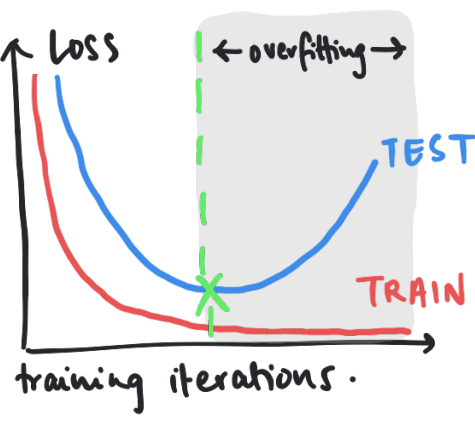

As the network starts to perform better and better, the loss for both the training data and the test/validation data should decrease. However we eventually reach a certain point where the training begins to focus too specifically on the training dataset and it loses performance on more general data, as confirmed by the rising of our test/validation loss. This is the beginning of overfitting, and we often stop our training here to avoid the problems mentioned above.

<!--start-block-->
<hr style="height: 1px;">

## 10.7 Computational Examples

Now that we have some conceptual basis for how neural networks work and operate, let's take a look at some examples using the library PyTorch starting with some simpler data.

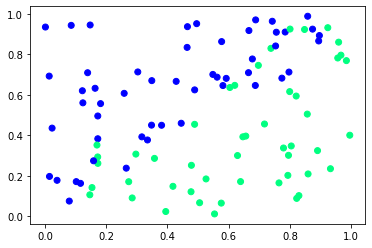

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# let's make some points
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)
# let's label them based on whether they're above or below y=x
# (with a little noise to make things interesting)
Y = np.greater(x+np.random.normal(scale=0.1,size=100),y)
X = np.array([x,y])
#  p l o t
plt.scatter(x,y,c=Y,cmap='winter')

To use our numpy arrays for PyTorch we need to convert them to tensors for our model to use:

In [3]:
X = torch.from_numpy(X).type(torch.FloatTensor) #Floats since these are coordinates of our points
Y = torch.from_numpy(Y).type(torch.LongTensor) #Long (Integers) corresponding to boolean true/false values for classification

Now we can construct our neural network!

In [4]:
class Classifier(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(Classifier,self).__init__()
        # our network will have 3 layers: one input, one hidden, and one output
        self.layer1 = nn.Linear(2,3) #Input layer with two inputs, the (x,y) coordinates and outputs 3 values  
        self.layer2 = nn.Linear(3,2) #Hidden layer which takes in 3 hidden values from previous layer and outputs 2 values
        
    def forward(self,x):
        # first layer output
        x = self.layer1(x)
        # using ReLU activation function
        x = F.relu(x)
        # getting the output
        x = self.layer2(x)
        return x
        
    # predicting the class of an input
    def predict(self,x):
        # We apply the softmax activation function to 2nd layer output 
        pred = F.softmax(self.forward(x))
        # We now have a list for each output corresponding to the "probability" of being classified as one class or the other
        ans = []
        # Pick the class with larger "probability" to determine which class our network predicts the point to be in
        for t in pred: #Do this for all points given and return a tensor with all predictions
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

Now let's get set up to train this classifying network!

In [5]:
# init the model       
model = Classifier()
# Define the loss function 
# Here we use cross-entropy loss because this is binary classification
criterion = nn.CrossEntropyLoss()
# Define the optimizer
# We use Adam, which adapts based on the gradient and previous SGD stpes
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#We give an initial learning rate value, lr/eta, but adam will adjust this

Finally we can start training:

In [6]:
# number of training epochs
epochs = 100
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

Now we can check how we did based on the predictions our network makes compared to the actual outputs from training data. <br><br>As a note, in more formal trainings we usually test our network based on data that it didn't train on to get a better idea of its performance on more general datasets.

0.83


<ipython-input-4-c96384211356>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


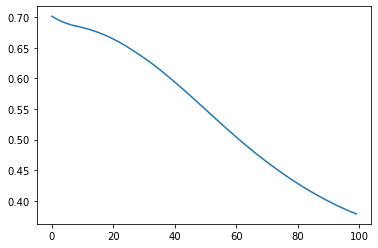

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X.T),Y))
plt.plot(losses)

We can visually see how our classifier is deciding by drawing out the decision boundary it's decided upon:

In [8]:
def predict(x):
 '''returns 0 or 1 given a single input'''
 x = torch.from_numpy(x).type(torch.FloatTensor)  # numpy to tensor
 ans = model.predict(x)
 return ans.numpy()

def plot_decision_boundary(pred,X,Y):
    h = 0.01
    # a grid with distance h
    xx,yy = np.meshgrid(np.arange(0,1,h), np.arange(0,1,h))
    # Predict the function over the grid
    Z = pred(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.binary)

Feel free to take the time to betterunderstand how the function plot_decision_boundary(pred,X,Y) works. It's essentially drawing a bunch of 2D grid of many points within the region our data points fall in and using the predictions from the network to determine the specific boundary for classification. We can plot the results from this to see visually how we did:

<ipython-input-4-c96384211356>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


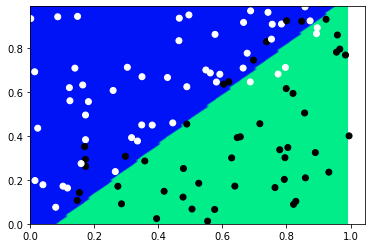

In [9]:
plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())

Not bad! We were able to do pretty well for this dataset. Let's now try a more complicated dataset.

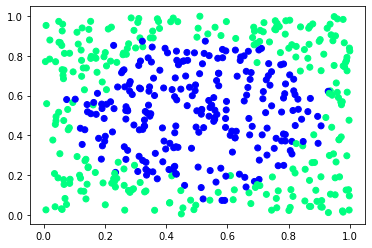

In [10]:
# let's make some points
x = np.random.uniform(size=500)
y = np.random.uniform(size=500)
# let's label them based on whether they fall within a circle of radius 0.39 centered at (0.5,0.5) with some noise as before
Y = np.square(x-0.5)+np.square(y-0.5)>(0.15+np.random.normal(scale=0.03,size=500))
X = np.array([x,y])
#  p l o t
plt.scatter(x,y,c=Y,cmap='winter')

X = torch.from_numpy(X).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.LongTensor)

Let's try our previous Classifier on this.

0.49


<ipython-input-4-c96384211356>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


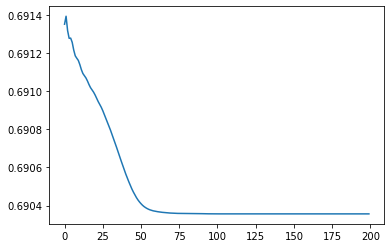

In [11]:
# init the model       
model = Classifier()
# define the loss function
criterion = nn.CrossEntropyLoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# number of training epochs
epochs = 200
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

print(accuracy_score(model.predict(X.T),Y))
plt.plot(losses)

<ipython-input-4-c96384211356>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


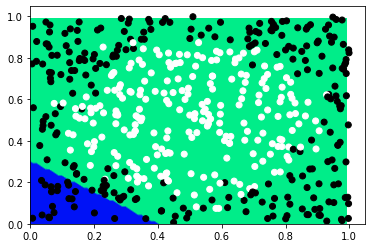

In [12]:
plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())

Using the same setup that worked for our previous problem and even training for twice as many epochs we're getting noticeably worse performance on this more complicated dataset. We could try training for more epochs, but instead let's try and improve the setup for our classifier.

In [13]:
class DenserClassifier(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(DenserClassifier,self).__init__()
        # our network will have 4 layers: one input, two hidden, and one output
        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,2)
        
    def forward(self,x):
        # first layer output
        x = self.layer1(x)
        # using ReLU activation function
        x = F.relu(x)
        # getting the output
        x = self.layer2(x)
         # using ReLU activation function
        x = F.relu(x)
        # getting the output
        x = self.layer3(x)
        return x
        
    # predicting the class of an input
    def predict(self,x):
        # apply softmax to output 
        pred = F.softmax(self.forward(x))
        ans = []
        # pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

Now let's train again for the same amount of epochs with this new denser model:

0.944


<ipython-input-13-206bb8d95290>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


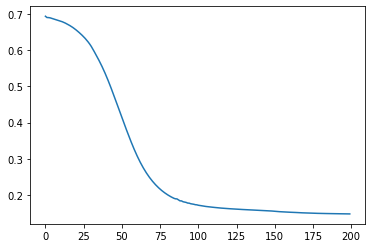

In [14]:
# init the model       
model = DenserClassifier()
# define the loss function
criterion = nn.CrossEntropyLoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# number of training epochs
epochs = 200
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

print(accuracy_score(model.predict(X.T),Y))
plt.plot(losses)

<ipython-input-13-206bb8d95290>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


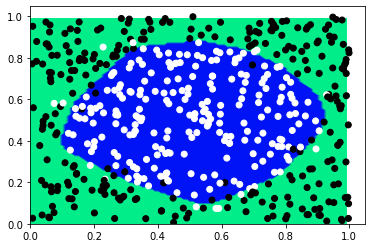

In [15]:
plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())

We can see here that our network performed much better on this dataset. Depending on the problem it's usually not enough to just increase the amount of training. <br>
We often have to restructure our neural network, changing and configuring our layers, the number of neurons in each layer, the activation functions, etc. until we have a model that is better suited for picking up on trends within the data.

#### <span style="color:#BA2220">>>>EXERCISE</span> 

Now that we've taken a look at some examples of using PyTorch to create and train neural networks, let's have you try it yourself on a new dataset.<br><br>
The files you need are X.csv and Y.csv, which correspond to the same uses for X and Y defined in the examples above. They should be located in the same folder of the GitHub repository as this recitation notebook. To load them in you can use the following script:

In [16]:
X = np.loadtxt("X.csv", delimiter=",")
Y = np.loadtxt("Y.csv", delimiter=",")

#If you wish to plot it use:
#plt.scatter(X[0],X[1],c=Y,cmap='winter')

There are some notes about these datasets:
* Values of $x$ run from [0,60]
* Values of $y$ run from [0,4]
* There are 3,141 coordinates, so expect this to take slightly longer than the examples above for a similarly sized network<br><br>
The ranges of $x$ and $y$ shouldn't affect your training but you'll have to adjust your code for plotting out visualizations of the boundary.<br><br>

There isn't an expectation for you to turn in a perfect neural network or to pass some accuracy threshold, the goal here is just to experiment with PyTorch and see how changing your network affects your performance, so have fun with it! <br>Try messing around with adding or removing layers, expanding the number of neurons in each layer, changing activation functions, changing the number of epochs, etc.<br><br>
The only expected deliverable here is some code that creates and trains a neural network in PyTorch, just as we have above.

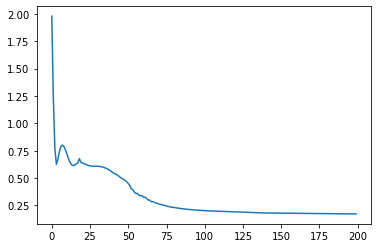

In [17]:
#My Solution, just fiddling around with a network

X = torch.from_numpy(X).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.LongTensor)

class MyClassifier(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(MyClassifier,self).__init__()
        # our network will have 4 layers: one input, two hidden, and one output
        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,20)
        self.layer3 = nn.Linear(20,10)
        self.layer4 = nn.Linear(10,2)
        
    def forward(self,x):
        x = self.layer1(x)
        x = F.softmax(x)
        x = self.layer2(x)
        x = F.softmax(x)
        x = self.layer3(x)
        x = F.relu(x)
        x = self.layer4(x)
        return x
        
    # predicting the class of an input
    def predict(self,x):
        # apply softmax to output 
        pred = F.softmax(self.forward(x))
        ans = []
        # pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)



from sklearn.metrics import accuracy_score

model = DenserClassifier()
# define the loss function
criterion = nn.CrossEntropyLoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# number of training epochs
epochs = 200
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()


plt.plot(losses)

<ipython-input-13-206bb8d95290>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


0.9375994906080866


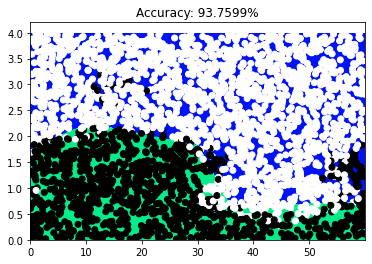

In [18]:

def predict(x):
 '''returns 0 or 1 given a single input'''
 x = torch.from_numpy(x).type(torch.FloatTensor)  # numpy to tensor
 ans = model.predict(x)
 return ans.numpy()

score = accuracy_score(model.predict(X.T),Y) 
print(score)

def plot_decision_boundary(pred,X,Y):
    h = 0.01
    # a grid with distance h
    xx,yy = np.meshgrid(np.arange(0,60,h), np.arange(0,4,h))
    # ppredict the function over the grid
    Z = pred(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.binary)

plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())
plt.title("Accuracy: "+str(np.round(100*score,4))+"%")
plt.show()